In [29]:
import pandas as pd

# Leer los archivos y asignarlos a DataFrames
try:
    # Leer archivo CSV (Mayo 25 Debito)
    df1 = pd.read_csv('Mayo 25 Debito.csv')
    
    # Leer archivos Excel (necesitarás openpyxl o xlrd instalado)
    df2 = pd.read_excel('Mayo 25 Lealtad LIMPIEZA1.xlsx', sheet_name='Mayo 25 L')
    df3 = pd.read_excel('Usuarios Activos Mayo 25.xlsx')
    
    # Mostrar mensaje de éxito
    print("Archivos leídos correctamente:")
    print(f"- df1 (Mayo 25 Debito): {df1.shape[0]} filas, {df1.shape[1]} columnas")
    print(f"- df2 (Mayo 25 Lealtad): {df2.shape[0]} filas, {df2.shape[1]} columnas")
    print(f"- df3 (Usuarios Activos Mayo 25): {df3.shape[0]} filas, {df3.shape[1]} columnas")
    
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo - {e}")
except Exception as e:
    print(f"Error al leer los archivos: {e}")

Archivos leídos correctamente:
- df1 (Mayo 25 Debito): 20588 filas, 15 columnas
- df2 (Mayo 25 Lealtad): 79867 filas, 16 columnas
- df3 (Usuarios Activos Mayo 25): 257100 filas, 9 columnas


Mayo 25 Debito

Estadísticas descriptivas:
           AÑO      MES     ClienteID         Litros  precio promedio  \
count  20588.0  20588.0  20588.000000   20588.000000     20588.000000   
mean    2025.0      5.0   4680.834758     366.409268        32.944978   
std        0.0      0.0   3184.971459    2629.282534        68.157914   
min     2025.0      5.0     22.000000       0.044000        22.990000   
25%     2025.0      5.0   1456.000000      35.000000        23.990000   
50%     2025.0      5.0   4483.000000      66.412000        24.490000   
75%     2025.0      5.0   7877.000000     157.333500        26.990000   
max     2025.0      5.0   9383.000000  127818.730000      2320.000000   

        Venta Total  
count  2.058800e+04  
mean   9.495371e+03  
std    6.892655e+04  
min    1.060000e+00  
25%    9.000000e+02  
50%    1.681130e+03  
75%    4.000000e+03  
max    3.449827e+06  




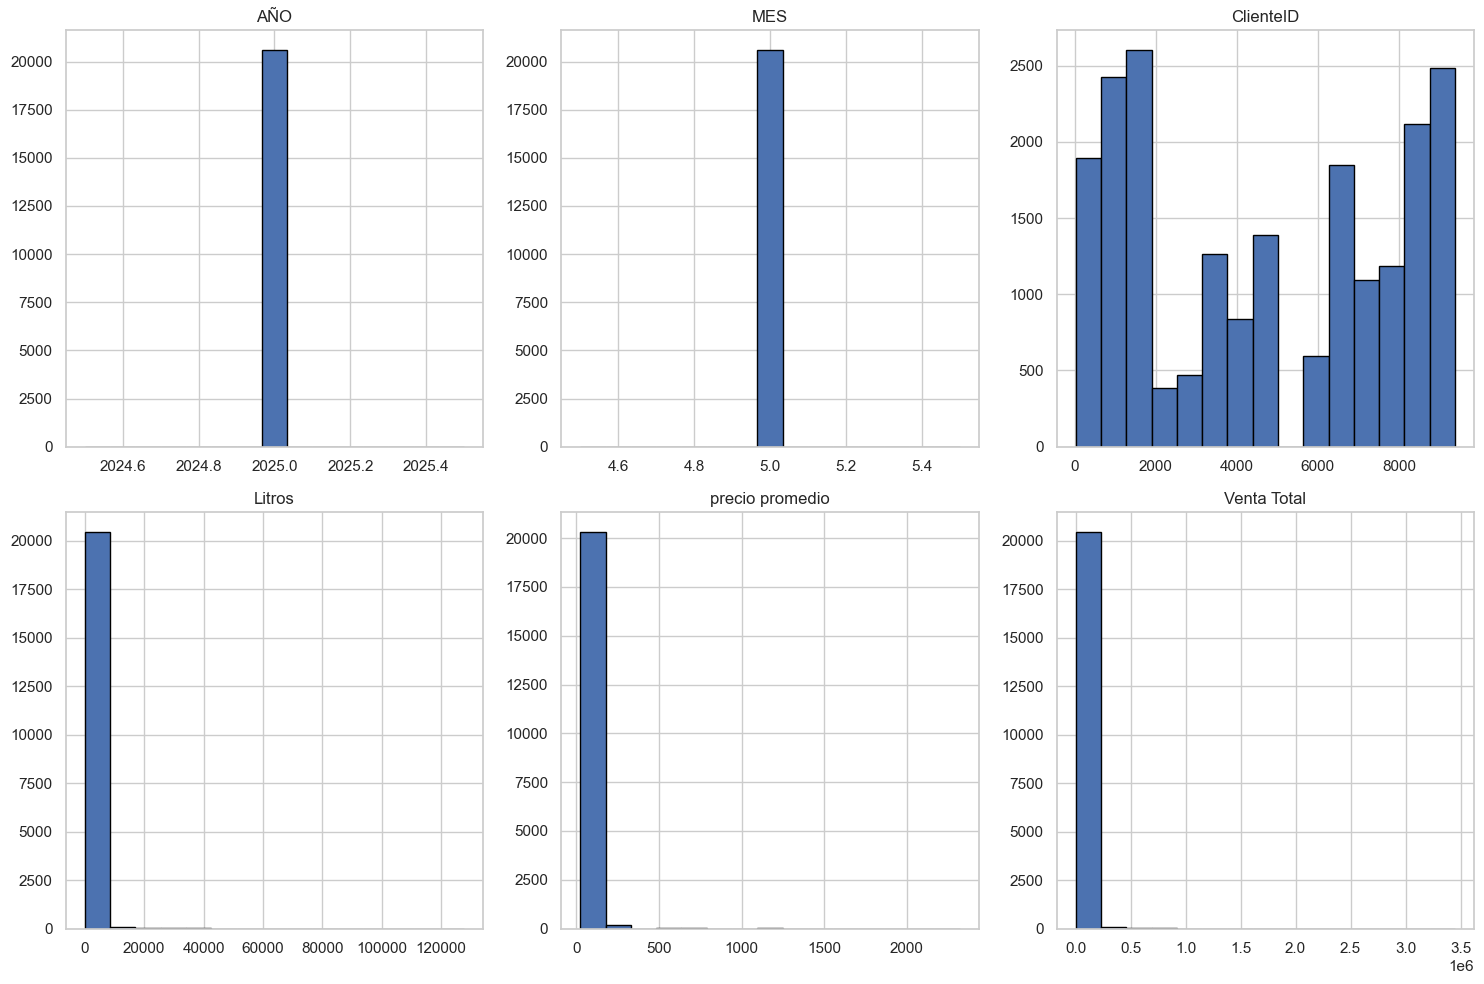

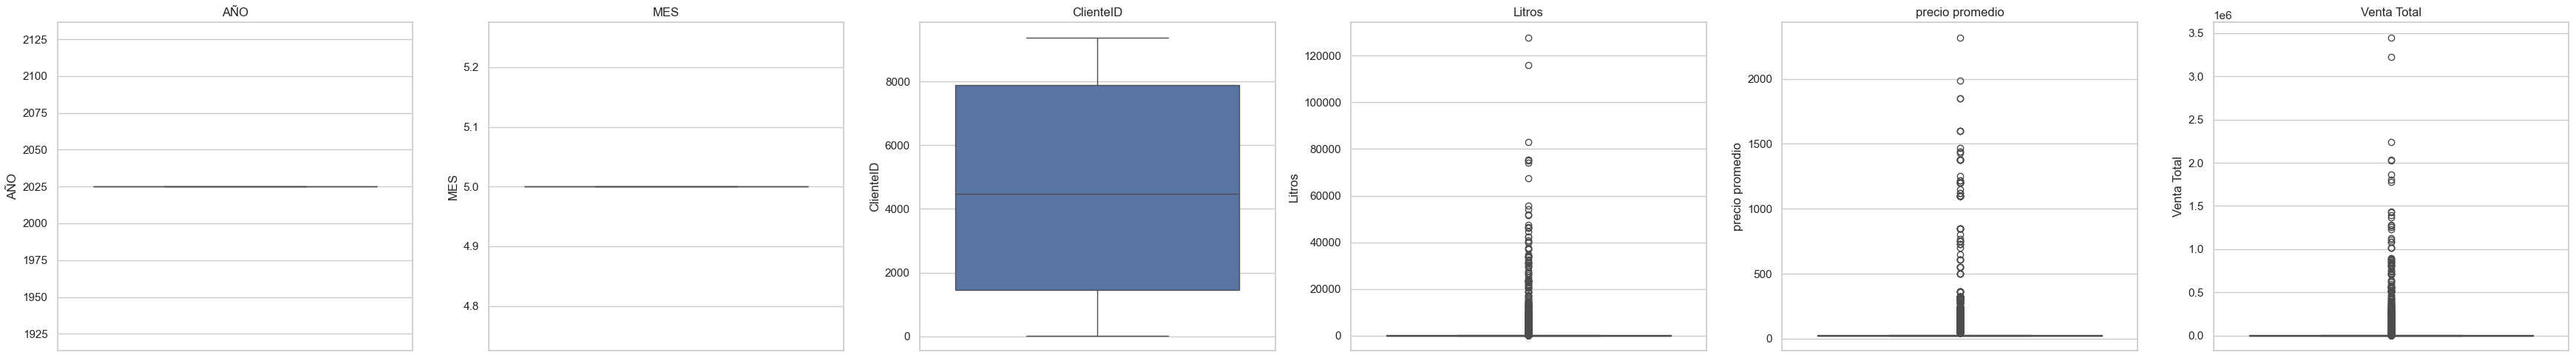



Columna: CodigoExterno
Tipo: object
Valores únicos: 9292
Valores nulos: 1854 (9.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Tipo
Tipo: object
Valores únicos: 2
Valores nulos: 0 (0.0%)

Distribución de valores:
Tipo
DEBITO     14517
CREDITO     6071


<Figure size 1200x600 with 0 Axes>

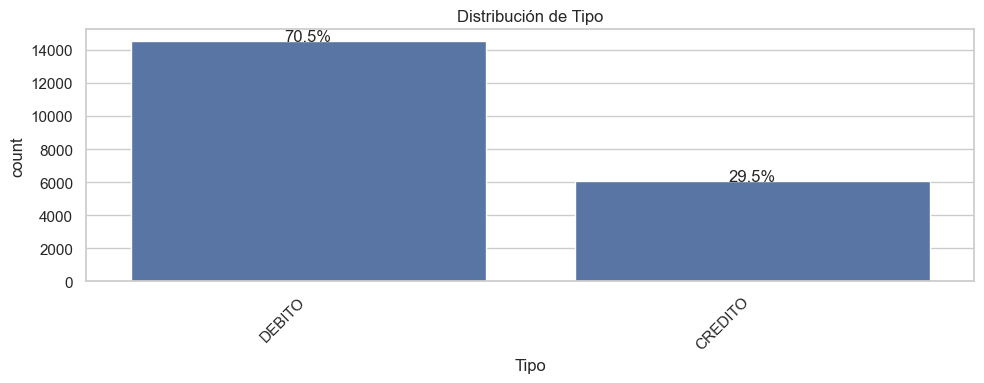


--------------------------------------------------------------------------------

Columna: Telefono
Tipo: object
Valores únicos: 1365
Valores nulos: 3110 (15.1%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Correo
Tipo: object
Valores únicos: 1537
Valores nulos: 877 (4.3%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Nombre
Tipo: object
Valores únicos: 1751
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: RazonSocial
Tipo: object
Valores únicos: 1665
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: commercial_name
Tipo: object
Valores únicos: 59
Val

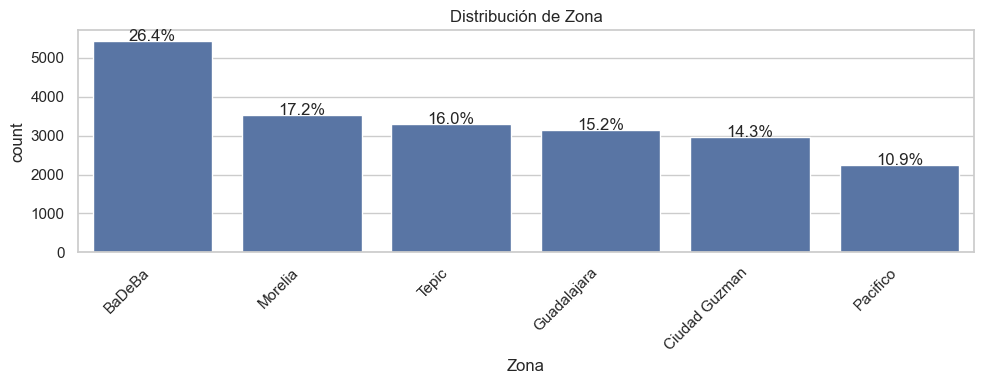


--------------------------------------------------------------------------------

Columna: Producto Venta
Tipo: object
Valores únicos: 121
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_numericas(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Configurar estilo de los gráficos
    sns.set(style="whitegrid")
    
    # Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    print(df[numeric_cols].describe())
    print("\n" + "="*80 + "\n")
    
    df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(-1, 3), edgecolor='black')
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")
    
    plt.figure(figsize=(35, 5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1, len(numeric_cols), i)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")

def analizar_categoricas(df, max_unique=40):
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    if len(cat_cols) == 0:
        print("No hay columnas categóricas en el DataFrame.")
        return
    
    # Configurar estilo de los gráficos
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    
    for col in cat_cols:
        unique_count = df[col].nunique()
        print(f"Columna: {col}")
        print(f"Tipo: {df[col].dtype}")
        print(f"Valores únicos: {unique_count}")
        print(f"Valores nulos: {df[col].isnull().sum()} ({df[col].isnull().mean():.1%})")
        
        if unique_count <= max_unique:
            # Mostrar frecuencia de valores
            print("\nDistribución de valores:")
            print(df[col].value_counts(dropna=False).to_string())
            
            # Graficar (omitir si hay muchos valores nulos)
            if df[col].isnull().mean() < 0.5:  # Solo si menos del 50% son nulos
                plt.figure(figsize=(10, 4))
                order = df[col].value_counts().index
                ax = sns.countplot(x=col, data=df, order=order)
                
                # Rotar etiquetas si son largas
                if any(len(str(x)) > 5 for x in df[col].unique()):
                    plt.xticks(rotation=45, ha='right')
                
                # Añadir porcentajes
                total = len(df[col])
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(p.get_x() + p.get_width()/2., height + 3,
                            f'{height/total:.1%}',
                            ha="center")
                
                plt.title(f'Distribución de {col}')
                plt.tight_layout()
                plt.show()
            else:
                print("\nDemasiados valores nulos para graficar.")
        else:
            print("\nDemasiados valores únicos para mostrar distribución.")
        
        print("\n" + "-"*80 + "\n")


print("="*80)
print("Mayo 25 Debito")
print("="*80 + "\n")
analizar_numericas(df1)
analizar_categoricas(df1, max_unique=30)

Mayo 25 Lealtad

Estadísticas descriptivas:
          No. Pases        litros         pesos      Relacion
count  79867.000000  79867.000000  7.986700e+04  79867.000000
mean       3.174290     90.871459  2.311187e+03     25.042822
std        4.411689    309.456787  8.338182e+03      1.441410
min        1.000000      0.037000  8.900000e-01     22.987979
25%        1.000000     20.000000  5.000000e+02     23.990000
50%        2.000000     40.629000  1.000000e+03     23.990404
75%        4.000000     88.288500  2.200000e+03     26.590719
max      216.000000  43086.913000  1.188767e+06     27.790178




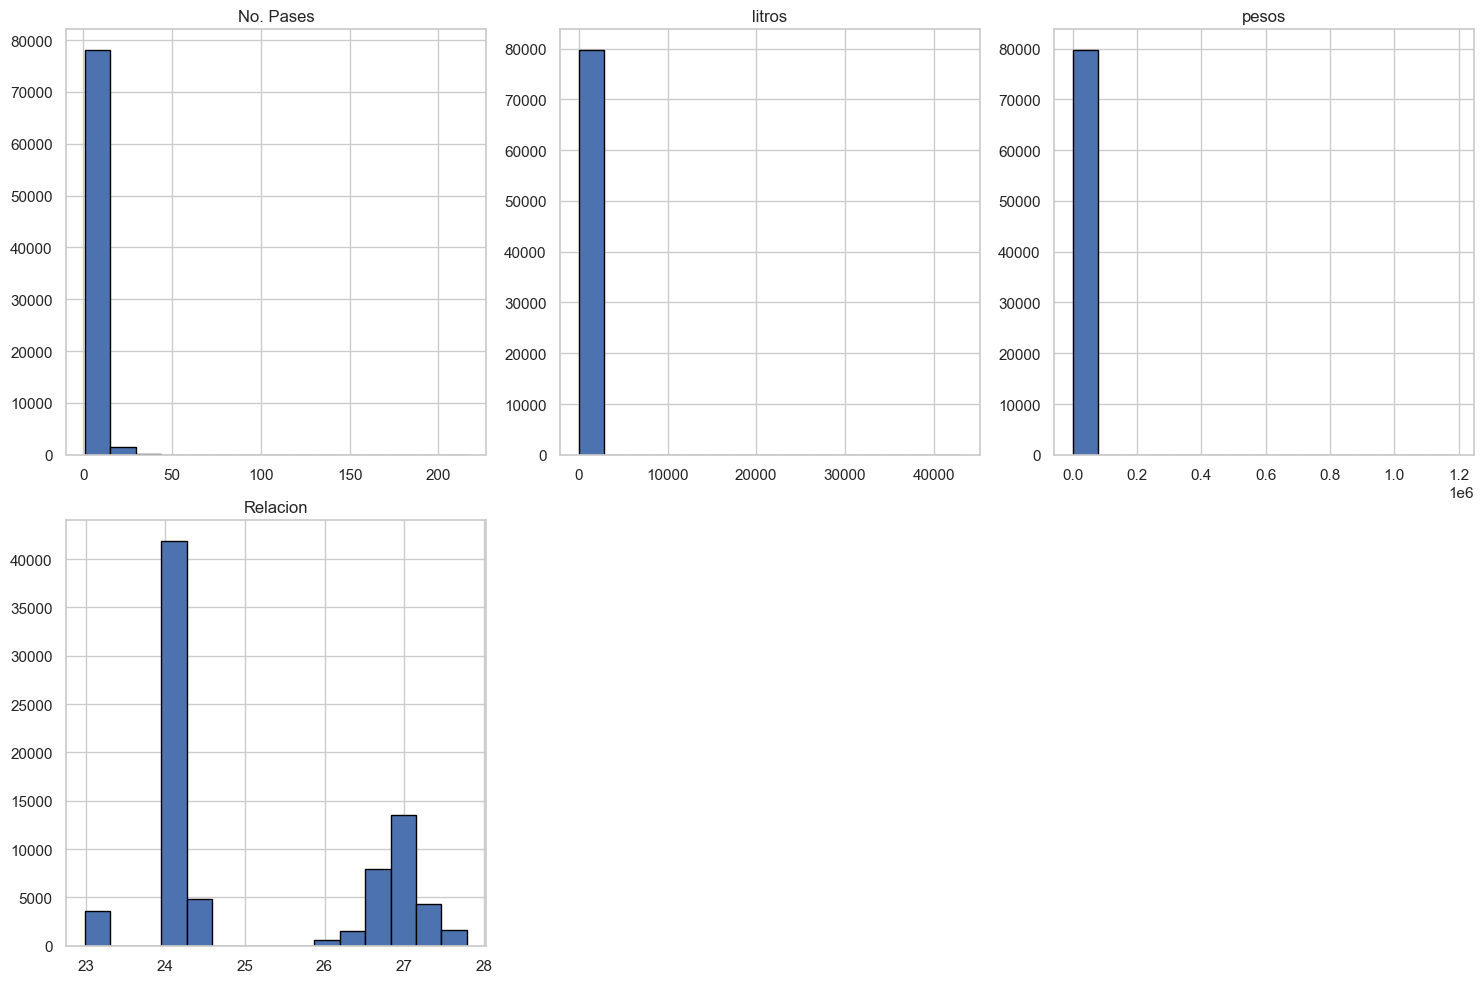

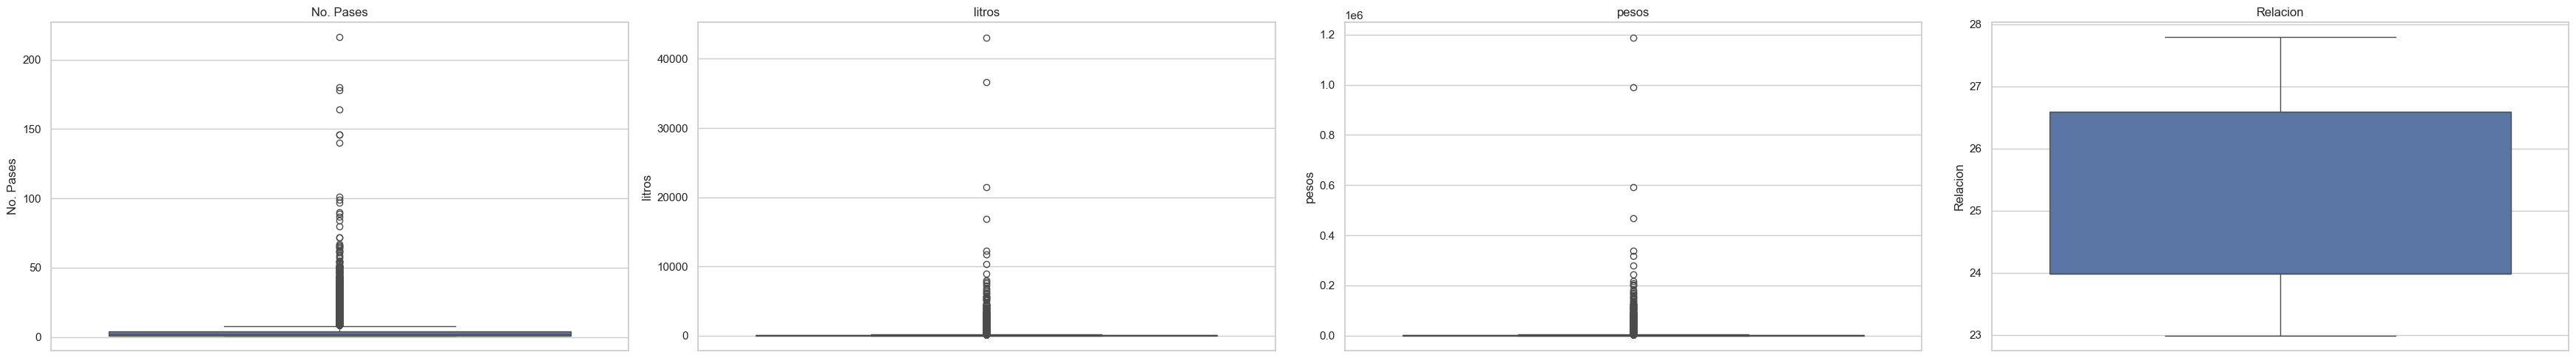



Columna: Tarjeta
Tipo: object
Valores únicos: 47121
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Tipo Tarjeta
Tipo: object
Valores únicos: 8
Valores nulos: 0 (0.0%)

Distribución de valores:
Tipo Tarjeta
TRADICIONAL    73322
TAXI            3807
PLATAFORMA      2239
-                404
GASCARD TU        39
LEALTAD           32
URBANO            20
BETTERWARE         4


<Figure size 1200x600 with 0 Axes>

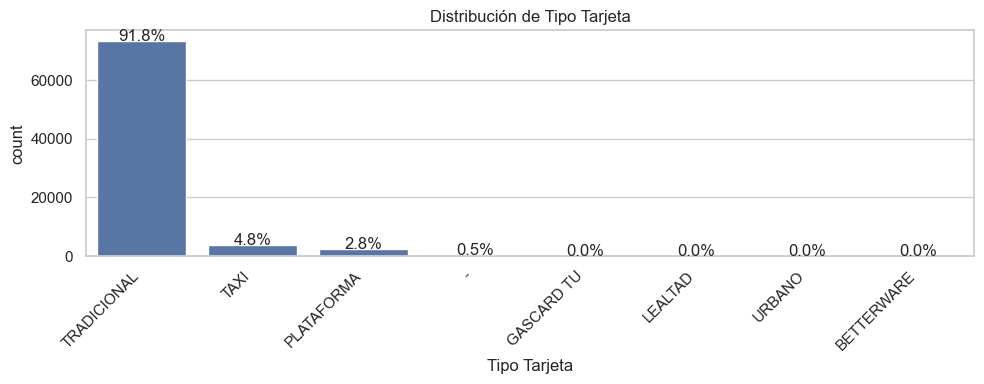


--------------------------------------------------------------------------------

Columna: Nombre
Tipo: object
Valores únicos: 45227
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Telefono
Tipo: object
Valores únicos: 36920
Valores nulos: 5 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Correo
Tipo: object
Valores únicos: 9808
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: commercial_name
Tipo: object
Valores únicos: 59
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Zona
Tipo: object
Valores únicos: 6
Valores nulos: 0 

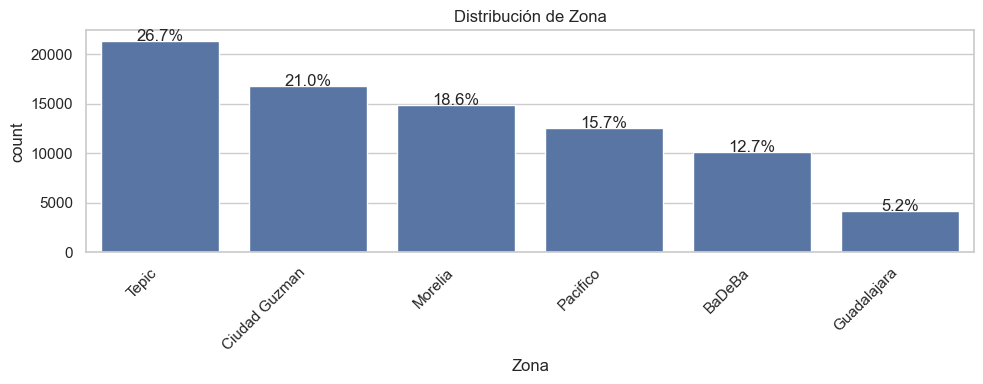


--------------------------------------------------------------------------------

Columna: short_description
Tipo: object
Valores únicos: 3
Valores nulos: 0 (0.0%)

Distribución de valores:
short_description
32011 PEMEX MAGNA      50370
32012 PEMEX PREMIUM    23609
34006 PEMEX DIESEL      5888


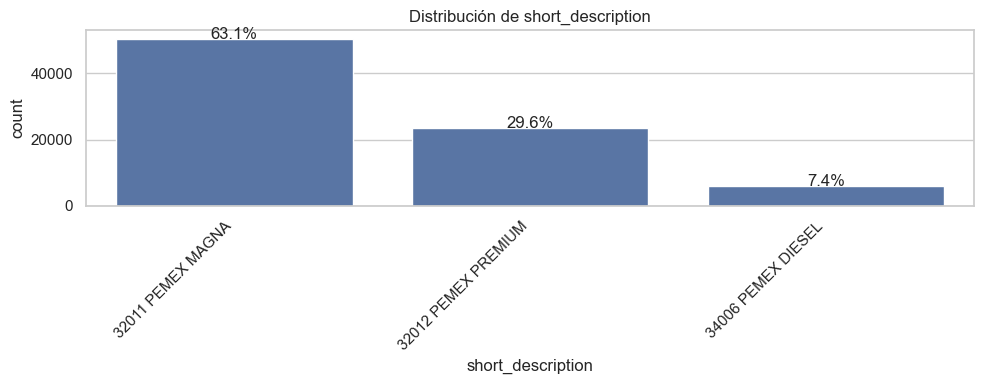


--------------------------------------------------------------------------------

Columna: Rango Por Estación
Tipo: object
Valores únicos: 14
Valores nulos: 0 (0.0%)

Distribución de valores:
Rango Por Estación
D      19202
E      18724
F       9049
C       8384
B       6895
G       6522
A       4776
H       3126
AA      1685
AAA      867
I        548
J         80
L          7
K          2


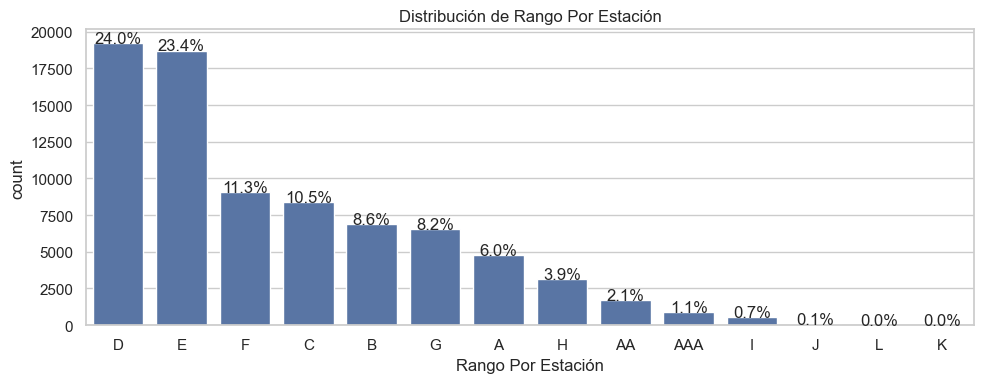


--------------------------------------------------------------------------------

Columna: Rango Por Mes
Tipo: object
Valores únicos: 14
Valores nulos: 26 (0.0%)

Distribución de valores:
Rango Por Mes
D      15880
A      13127
B      12906
C      11603
E       9831
AA      6040
F       3870
AAA     3360
G       2102
H        907
I        182
J         29
NaN       26
K          2
L          2


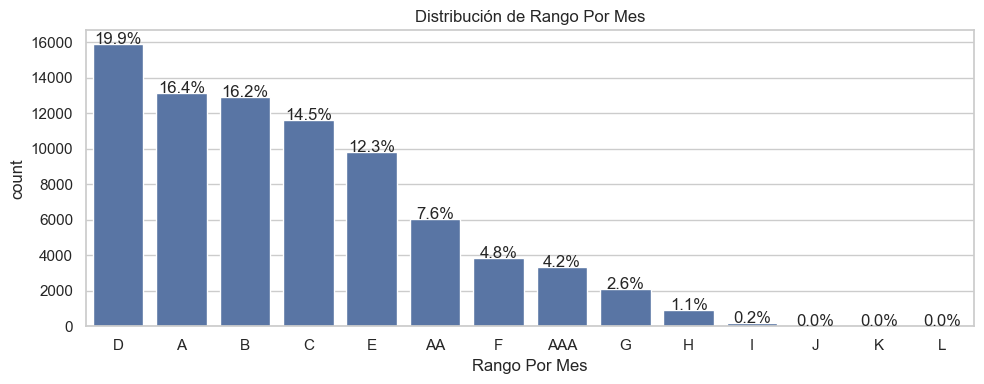


--------------------------------------------------------------------------------

Columna: Frecuencia
Tipo: object
Valores únicos: 2
Valores nulos: 0 (0.0%)

Distribución de valores:
Frecuencia
FRECUENTE         44135
POCO FRECUENTE    35732


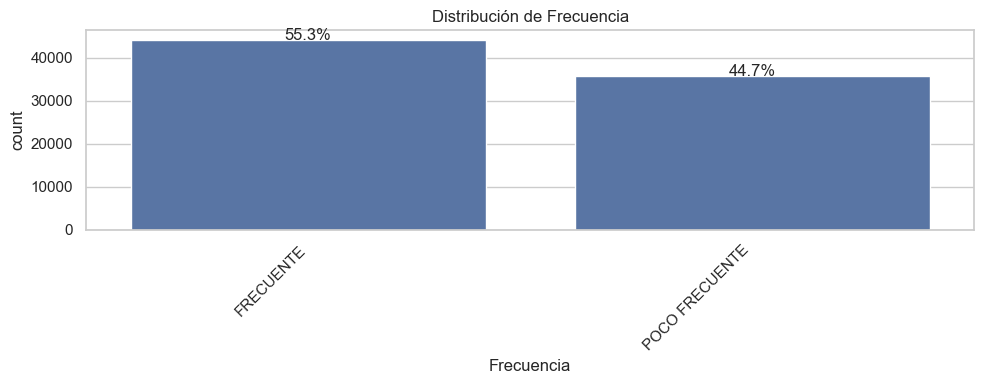


--------------------------------------------------------------------------------

Columna: TIPO DE CONSUMO
Tipo: object
Valores únicos: 2
Valores nulos: 26 (0.0%)

Distribución de valores:
TIPO DE CONSUMO
CONSUMO VARIABLE    45394
CONSUMO ESTABLE     34447
NaN                    26


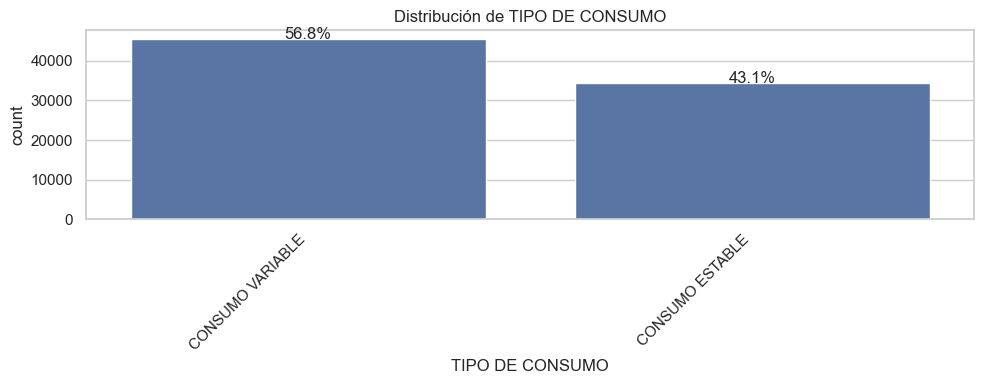


--------------------------------------------------------------------------------



In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_numericas(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Configurar estilo de los gráficos
    sns.set(style="whitegrid")
    
    # Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    print(df[numeric_cols].describe())
    print("\n" + "="*80 + "\n")
    
    df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(-1, 3), edgecolor='black')
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")
    
    plt.figure(figsize=(35, 5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1, len(numeric_cols), i)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")

def analizar_categoricas(df, max_unique=40):
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    if len(cat_cols) == 0:
        print("No hay columnas categóricas en el DataFrame.")
        return
    
    # Configurar estilo de los gráficos
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    
    for col in cat_cols:
        unique_count = df[col].nunique()
        print(f"Columna: {col}")
        print(f"Tipo: {df[col].dtype}")
        print(f"Valores únicos: {unique_count}")
        print(f"Valores nulos: {df[col].isnull().sum()} ({df[col].isnull().mean():.1%})")
        
        if unique_count <= max_unique:
            # Mostrar frecuencia de valores
            print("\nDistribución de valores:")
            print(df[col].value_counts(dropna=False).to_string())
            
            # Graficar (omitir si hay muchos valores nulos)
            if df[col].isnull().mean() < 0.5:  # Solo si menos del 50% son nulos
                plt.figure(figsize=(10, 4))
                order = df[col].value_counts().index
                ax = sns.countplot(x=col, data=df, order=order)
                
                # Rotar etiquetas si son largas
                if any(len(str(x)) > 5 for x in df[col].unique()):
                    plt.xticks(rotation=45, ha='right')
                
                # Añadir porcentajes
                total = len(df[col])
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(p.get_x() + p.get_width()/2., height + 3,
                            f'{height/total:.1%}',
                            ha="center")
                
                plt.title(f'Distribución de {col}')
                plt.tight_layout()
                plt.show()
            else:
                print("\nDemasiados valores nulos para graficar.")
        else:
            print("\nDemasiados valores únicos para mostrar distribución.")
        
        print("\n" + "-"*80 + "\n")


print("="*80)
print("Mayo 25 Lealtad")
print("="*80 + "\n")
analizar_numericas(df2)
analizar_categoricas(df2, max_unique=30)

In [31]:
df2

,Tarjeta,Tipo Tarjeta,Nombre,Telefono,Correo,No. Pases,commercial_name,Zona,short_description,litros,pesos,Rango Por Estación,Rango Por Mes,Relacion,Frecuencia,TIPO DE CONSUMO
0,110167146,TRADICIONAL,MIREYA NOEMI LANGARICA VILLA,2137487,0,1,Pinos,Tepic,32011 PEMEX MAGNA,50.036,1150.33,D,D,22.990047,POCO FRECUENTE,CONSUMO ESTABLE
1,110260775,TRADICIONAL,MARIA CESILIA MU√É¬±OZ ROSALES,3111229027,CECYZ0461@HOTMAIL.COM,1,Nayarabastos,Pacifico,32011 PEMEX MAGNA,25.010,600.00,E,E,23.990404,POCO FRECUENTE,CONSUMO ESTABLE
2,110361693,TRADICIONAL,LETICIA LANGARICA MONRROY,213 65 64,letuylamo@hotmaill.com,1,Campo de Golf,BaDeBa,32012 PEMEX PREMIUM,20.000,539.80,E,D,26.990000,POCO FRECUENTE,CONSUMO VARIABLE
3,110461038,TRADICIONAL,TANIA BLNCO,311 172 72 21,tania.blancoruelas@gmail.com,1,Bonaterra,Pacifico,32012 PEMEX PREMIUM,40.000,1063.60,D,C,26.590000,POCO FRECUENTE,CONSUMO VARIABLE
4,110465870,TRADICIONAL,ARCELI SALAZAR,3111188827,0,3,Pinos,Tepic,32011 PEMEX MAGNA,56.547,1300.00,D,D,22.989725,FRECUENTE,CONSUMO ESTABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79862,309332488,TRADICIONAL,JAIME EDUARDO ESQUIVEL RIOS,3222456536,JAIMEEDU98@GMAIL.COM,1,Campo de Golf,BaDeBa,32011 PEMEX MAGNA,62.617,1533.49,D,AAA,24.489995,POCO FRECUENTE,CONSUMO VARIABLE
79863,309332488,TRADICIONAL,JAIME EDUARDO ESQUIVEL RIOS,3222456536,JAIMEEDU98@GMAIL.COM,1,Nuevo Vallarta,BaDeBa,34006 PEMEX DIESEL,217.470,6000.00,A,AAA,27.590012,POCO FRECUENTE,CONSUMO VARIABLE
79864,309332489,TRADICIONAL,MILLAN DIONICIO GONZALES,3221130375,MILLANDIONI87@GMAIL.COM,2,Nuevo Vallarta,BaDeBa,32012 PEMEX PREMIUM,51.871,1400.00,D,AA,26.990033,FRECUENTE,CONSUMO VARIABLE
79865,309332500,TRADICIONAL,JESUS ENRIQUE RODRIGUEZ,3222882646,ENRIQUERODRIGUEZ2812@GMAIL.COM,1,Campo de Golf,BaDeBa,34006 PEMEX DIESEL,66.702,1840.31,D,A,27.590027,POCO FRECUENTE,CONSUMO VARIABLE


Mayo 25 usuarios

No hay columnas numéricas en el DataFrame.
Columna: Tarjeta
Tipo: object
Valores únicos: 255990
Valores nulos: 1 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Tipo Tarjeta
Tipo: object
Valores únicos: 7
Valores nulos: 0 (0.0%)

Distribución de valores:
Tipo Tarjeta
TRADICIONAL    249096
TAXI             4631
PLATAFORMA       2365
BETTERWARE        890
URBANO             53
LEALTAD            43
GASCARD TU         22


<Figure size 1200x600 with 0 Axes>

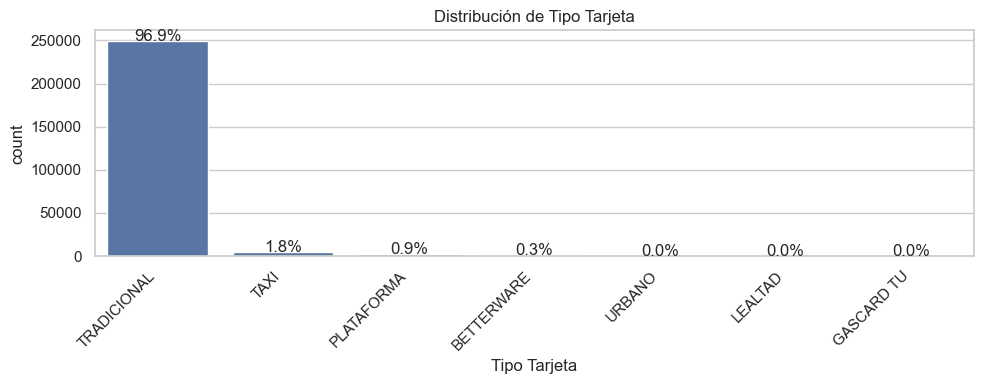


--------------------------------------------------------------------------------

Columna: Nombre del Cliente
Tipo: object
Valores únicos: 209919
Valores nulos: 1 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Telefono
Tipo: object
Valores únicos: 165013
Valores nulos: 42870 (16.7%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Email
Tipo: object
Valores únicos: 46242
Valores nulos: 196802 (76.5%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Litros Febrero
Tipo: object
Valores únicos: 27378
Valores nulos: 0 (0.0%)

Demasiados valores únicos para mostrar distribución.

--------------------------------------------------------------------------------

Columna: Litros Marzo
Tipo: object


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_numericas(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    if len(numeric_cols) == 0:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Configurar estilo de los gráficos
    sns.set(style="whitegrid")
    
    # Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    print(df[numeric_cols].describe())
    print("\n" + "="*80 + "\n")
    
    df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(-1, 3), edgecolor='black')
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")
    
    plt.figure(figsize=(35, 5))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(1, len(numeric_cols), i)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*80 + "\n")

def analizar_categoricas(df, max_unique=40):
    cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    if len(cat_cols) == 0:
        print("No hay columnas categóricas en el DataFrame.")
        return
    
    # Configurar estilo de los gráficos
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    
    
    for col in cat_cols:
        unique_count = df[col].nunique()
        print(f"Columna: {col}")
        print(f"Tipo: {df[col].dtype}")
        print(f"Valores únicos: {unique_count}")
        print(f"Valores nulos: {df[col].isnull().sum()} ({df[col].isnull().mean():.1%})")
        
        if unique_count <= max_unique:
            # Mostrar frecuencia de valores
            print("\nDistribución de valores:")
            print(df[col].value_counts(dropna=False).to_string())
            
            # Graficar (omitir si hay muchos valores nulos)
            if df[col].isnull().mean() < 0.5:  # Solo si menos del 50% son nulos
                plt.figure(figsize=(10, 4))
                order = df[col].value_counts().index
                ax = sns.countplot(x=col, data=df, order=order)
                
                # Rotar etiquetas si son largas
                if any(len(str(x)) > 5 for x in df[col].unique()):
                    plt.xticks(rotation=45, ha='right')
                
                # Añadir porcentajes
                total = len(df[col])
                for p in ax.patches:
                    height = p.get_height()
                    ax.text(p.get_x() + p.get_width()/2., height + 3,
                            f'{height/total:.1%}',
                            ha="center")
                
                plt.title(f'Distribución de {col}')
                plt.tight_layout()
                plt.show()
            else:
                print("\nDemasiados valores nulos para graficar.")
        else:
            print("\nDemasiados valores únicos para mostrar distribución.")
        
        print("\n" + "-"*80 + "\n")


print("="*80)
print("Mayo 25 usuarios")
print("="*80 + "\n")
analizar_numericas(df3)
analizar_categoricas(df3, max_unique=30)

In [23]:
df3

,Tarjeta,Tipo Tarjeta,Nombre del Cliente,Telefono,Email,Litros Febrero,Litros Marzo,Litros Abril,Litros Mayo
0,306261816,TRADICIONAL,MORALES FREGOSO FRANCISCO ANTONIO,3221178678,NaN,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
1,305761490,TRADICIONAL,MARIA DEL ROSARIO SALAZAR MORENO,NaN,MRAYGO@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
2,307461605,TRADICIONAL,0,0,NaN,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
3,303669465,TRADICIONAL,RUBEN SALGADO ZAVALA,NaN,rusaza2003@hotmail.com,491.644,572.495,395.308,535.706
4,305868610,TRADICIONAL,RAMON GUZMAN TENA,NaN,NaN,218.081,109.362,588.153,688.879
...,...,...,...,...,...,...,...,...,...
257095,309332289,TRADICIONAL,AUREA RAMOS LAUREANO,3221427865,AUREA@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
257096,309332297,TRADICIONAL,JOSE MANUEL JAIMES VAZQUEZ,NaN,JAIMES@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
257097,309332296,TRADICIONAL,DAVID MANCHA BARRON,3221483092,FAVIDMANCHA@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
257098,n30756030,TRADICIONAL,GRUPO OCTANO GERENCIA MORELIA,4433231619,NaN,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR


In [ ]:
import re

def limpiar_emails(df3, columna_email='Email'):
    df_clean = df3.copy()
    
    # Guardar el número inicial de filas
    filas_originales = len(df_clean)
    
    # 1. Eliminar filas donde el email es nulo o vacío
    df_clean = df_clean.dropna(subset=[columna_email])
    df_clean = df_clean[df_clean[columna_email].str.strip() != '']
    
    # 2. Definir patrón regex para validación de email
    patron_email = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    
    # 3. Filtrar solo emails válidos
    mascara_validos = df_clean[columna_email].str.match(patron_email, na=False)
    df_clean = df_clean[mascara_validos]
    
    # Calcular estadísticas de limpieza
    filas_finales = len(df_clean)
    eliminadas = filas_originales - filas_finales
    
    print(f"Proceso completado:")
    print(f"- Filas originales: {filas_originales}")
    print(f"- Filas eliminadas: {eliminadas} ({eliminadas/filas_originales:.1%})")
    print(f"- Filas válidas: {filas_finales}")
    
    return df_clean

df4 = limpiar_emails(df3, 'Email')

Proceso completado:
- Filas originales: 257100
- Filas eliminadas: 198052 (77.0%)
- Filas válidas: 59048


In [25]:
df4

,Tarjeta,Tipo Tarjeta,Nombre del Cliente,Telefono,Email,Litros Febrero,Litros Marzo,Litros Abril,Litros Mayo
1,305761490,TRADICIONAL,MARIA DEL ROSARIO SALAZAR MORENO,NaN,MRAYGO@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
3,303669465,TRADICIONAL,RUBEN SALGADO ZAVALA,NaN,rusaza2003@hotmail.com,491.644,572.495,395.308,535.706
5,306962449,TRADICIONAL,EDUARDO URIEL VAZQUEZ SANCHEZ,0,alesan860@hotmail.com,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
10,306868103,TRADICIONAL,AMERICA ENCISO LOPEZ,3411355135,CLIENTE@GASCRDMEXICO.OPM.MX,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
13,305864367,TRADICIONAL,ARMANDO GOMEZ,0,AGOMEZ@HERRAMIENTASAG.COM,256.708,204.18,346.778,289.906
...,...,...,...,...,...,...,...,...,...
257094,309332288,TRADICIONAL,HECTOR LEONARDO LOZA CAMPOS,3322297721,HECTOR@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
257095,309332289,TRADICIONAL,AUREA RAMOS LAUREANO,3221427865,AUREA@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
257096,309332297,TRADICIONAL,JOSE MANUEL JAIMES VAZQUEZ,NaN,JAIMES@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR
257097,309332296,TRADICIONAL,DAVID MANCHA BARRON,3221483092,FAVIDMANCHA@HOTMAIL.COM,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR,SIN COMPRAR



Histogramas de las columnas de litros:


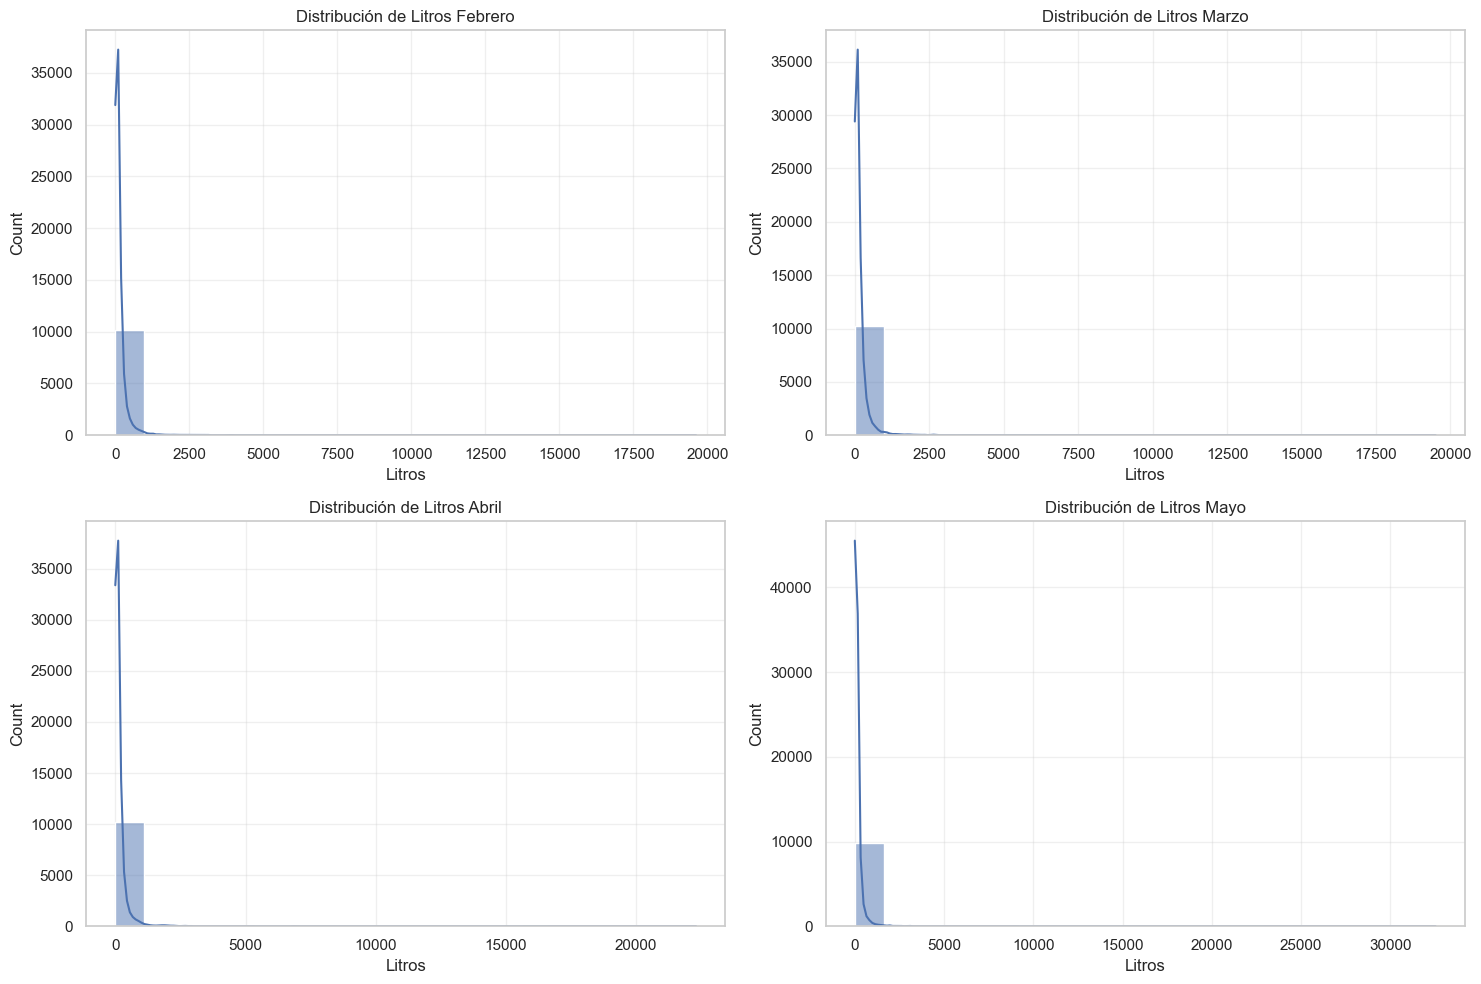


Estadísticas descriptivas:
       Litros Febrero  Litros Marzo  Litros Abril   Litros Mayo
count    10355.000000  10440.000000  10346.000000   9945.000000
mean       149.158843    161.831005    156.973559    148.901200
std        394.452826    418.762625    453.503625    508.615334
min          1.107000      0.955000      1.113000      0.834000
25%         34.378000     37.421500     36.914000     35.649000
50%         72.020000     80.000000     75.031500     72.356000
75%        149.825500    164.601250    155.000000    148.000000
max      19618.597000  19501.456000  22293.841000  32536.034000


In [ ]:
def procesar_litros(df, columnas=None):
    df= df4.copy()
    if columnas is None:
        columnas = ['Litros Febrero', 'Litros Marzo', 'Litros Abril', 'Litros Mayo']
    
    # 1. Reemplazar valores no numéricos por NaN
    for col in columnas:
        if col in df.columns:
            # Convertir a numérico, los no convertibles serán NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Advertencia: Columna {col} no encontrada en el DataFrame")
    
    # 2. Crear columna de promedio (ignorando NaN)
    df['Promedio Litros'] = df[columnas].mean(axis=1, skipna=True)
    # 3. Graficar histogramas
    print("\nHistogramas de las columnas de litros:")
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(columnas, 1):
        if col in df.columns:
            plt.subplot(2, 2, i)
            sns.histplot(df[col], bins=20, kde=True)
            plt.title(f'Distribución de {col}')
            plt.xlabel('Litros')
            plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Mostrar estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df[columnas].describe())
    
    return df

# Ejemplo de uso:
df_procesado = procesar_litros(df4)

In [ ]:
df_procesado

,Tarjeta,Tipo Tarjeta,Nombre del Cliente,Telefono,Email,Litros Febrero,Litros Marzo,Litros Abril,Litros Mayo,Promedio Litros
1,305761490,TRADICIONAL,MARIA DEL ROSARIO SALAZAR MORENO,NaN,MRAYGO@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN
3,303669465,TRADICIONAL,RUBEN SALGADO ZAVALA,NaN,rusaza2003@hotmail.com,491.644,572.495,395.308,535.706,498.78825
5,306962449,TRADICIONAL,EDUARDO URIEL VAZQUEZ SANCHEZ,0,alesan860@hotmail.com,NaN,NaN,NaN,NaN,NaN
10,306868103,TRADICIONAL,AMERICA ENCISO LOPEZ,3411355135,CLIENTE@GASCRDMEXICO.OPM.MX,NaN,NaN,NaN,NaN,NaN
13,305864367,TRADICIONAL,ARMANDO GOMEZ,0,AGOMEZ@HERRAMIENTASAG.COM,256.708,204.180,346.778,289.906,274.39300
...,...,...,...,...,...,...,...,...,...,...
257094,309332288,TRADICIONAL,HECTOR LEONARDO LOZA CAMPOS,3322297721,HECTOR@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN
257095,309332289,TRADICIONAL,AUREA RAMOS LAUREANO,3221427865,AUREA@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN
257096,309332297,TRADICIONAL,JOSE MANUEL JAIMES VAZQUEZ,NaN,JAIMES@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN
257097,309332296,TRADICIONAL,DAVID MANCHA BARRON,3221483092,FAVIDMANCHA@HOTMAIL.COM,NaN,NaN,NaN,NaN,NaN


In [32]:
df1

,AÑO,MES,ClienteID,CodigoExterno,Tipo,Telefono,Correo,Nombre,RazonSocial,commercial_name,Zona,Producto Venta,Litros,precio promedio,Venta Total
0,2025,5,22,300043657,DEBITO,NaN,bernal.m@tierratropical.com.mx,9061 TIERRA TROPICAL,TIERRA TROPICAL,San Francisco,BaDeBa,Magna,72.441,24.49,1774.08
1,2025,5,22,300044132,DEBITO,NaN,bernal.m@tierratropical.com.mx,9061 TIERRA TROPICAL,TIERRA TROPICAL,Nuevo Vallarta,BaDeBa,Premium,41.616,26.99,1123.22
2,2025,5,22,300048114,DEBITO,NaN,bernal.m@tierratropical.com.mx,9061 TIERRA TROPICAL,TIERRA TROPICAL,Bucerias,BaDeBa,Magna,34.204,24.49,837.65
3,2025,5,22,300048115,DEBITO,NaN,bernal.m@tierratropical.com.mx,9061 TIERRA TROPICAL,TIERRA TROPICAL,Nuevo Vallarta,BaDeBa,Magna,86.157,24.49,2109.98
4,2025,5,22,300048115,DEBITO,NaN,bernal.m@tierratropical.com.mx,9061 TIERRA TROPICAL,TIERRA TROPICAL,San Francisco,BaDeBa,Magna,40.098,24.49,982.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20583,2025,5,9365,300440188,DEBITO,3111172716,avomir02@gmail.com,CHRISTIAN JACINTO MIRANDA GARCIA (prepago),CHRISTIAN JACINTO MIRANDA GARCIA,Centro Carretero,Tepic,Diesel,148.204,26.99,4000.00
20584,2025,5,9365,300440191,DEBITO,3111172716,avomir02@gmail.com,CHRISTIAN JACINTO MIRANDA GARCIA (prepago),CHRISTIAN JACINTO MIRANDA GARCIA,Centro Carretero,Tepic,Magna,210.135,23.99,5041.14
20585,2025,5,9365,300440194,DEBITO,3111172716,avomir02@gmail.com,CHRISTIAN JACINTO MIRANDA GARCIA (prepago),CHRISTIAN JACINTO MIRANDA GARCIA,Centro Carretero,Tepic,Magna,104.210,23.99,2500.00
20586,2025,5,9365,300440197,DEBITO,3111172716,avomir02@gmail.com,CHRISTIAN JACINTO MIRANDA GARCIA (prepago),CHRISTIAN JACINTO MIRANDA GARCIA,Centro Carretero,Tepic,Premium,75.216,26.59,2000.00
